In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame

Read File

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)

X_after, test = train_test_split(x, test_size=0.2, random_state=42)

X_after, test_daily = train_test_split(X_after, test_size=0.125, random_state=42)


colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
X_after

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
23066,37.544962,127.136792,0.003333,0.024833,0.030333,0.404167,24.458333,13.375000
3263,37.487355,126.927102,0.003583,0.032000,0.030583,0.625000,50.666667,45.458333
24329,37.480917,126.971481,0.004000,0.023556,0.020444,0.438889,40.611111,25.000000
3190,37.540033,127.004850,0.003000,0.033800,0.006333,0.600000,38.533333,29.133333
9665,37.452357,126.908296,0.005429,0.027429,0.070143,0.628571,85.285714,53.571429
...,...,...,...,...,...,...,...,...
17024,37.575743,127.028885,0.004455,0.024409,0.030409,0.354545,54.045455,27.227273
745,37.555580,126.905597,0.003375,0.025833,0.014083,0.520833,38.958333,20.708333
20606,37.525939,126.856603,0.003583,0.026958,0.028125,0.504167,51.208333,44.666667
20216,37.525939,126.856603,0.007238,0.049476,0.028048,0.652381,74.809524,57.523810


In [4]:
class K_Means:
    def __init__(self, tol=0.001, max_iter=300):
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data, k):

        self.centroids = {}

        for i in range(k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) 
                        for centroid in self.centroids
                    ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = False

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) < self.tol:
                    optimized = True

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [5]:
x2 = X_after[['SO2','NO2','O3','CO','PM10','PM2.5']].copy()
x2.head()

,SO2,NO2,O3,CO,PM10,PM2.5
23066,0.003333,0.024833,0.030333,0.404167,24.458333,13.375000
3263,0.003583,0.032000,0.030583,0.625000,50.666667,45.458333
24329,0.004000,0.023556,0.020444,0.438889,40.611111,25.000000
3190,0.003000,0.033800,0.006333,0.600000,38.533333,29.133333
9665,0.005429,0.027429,0.070143,0.628571,85.285714,53.571429


In [6]:
x_array = np.array(x2)

In [7]:
clf = K_Means()
clf.fit(x_array, 3)

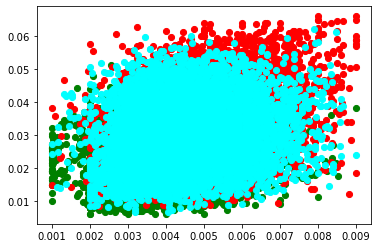

In [8]:
list_class = []
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(
            featureset[0], featureset[1],
            marker='.', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()